# Generative Adversarial Network

In [1]:
import numpy as np
import torch
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline  
%config InlineBackend.figure_format='retina'
print ("PyTorch version:[%s]."%(torch.__version__))

# Device Configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print ("This notebook use [%s]."%(device))

PyTorch version:[1.7.0].
This notebook use [cuda:0].


# Set hyper-parameter

In [2]:
EPOCHS = 100
LATENT_SIZE = 100
BATCH_SIZE = 64
LEARNING_RATE = 0.002

# Prepare dataset

In [3]:
transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.5], std=[0.5])])
# MNIST dataset
mnist_train = datasets.MNIST(root='./data/', train=True, transform=transform, download=True)
mnist_test = datasets.MNIST(root='./data/', train=False, transform=transform, download=True)

train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=BATCH_SIZE, shuffle=True, num_workers=1)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=BATCH_SIZE, shuffle=True, num_workers=1)

print("Preparing dataset done!")

Preparing dataset done!


# Defining Model

In [4]:
# our model
class Generator(nn.Module):
    def __init__(self, latent_size=100, output_size=784):
        super(Generator, self).__init__()
        self.linear1 = nn.Linear(latent_size, 256)
        self.bnorm1 = nn.BatchNorm1d(256)
        self.linear2 = nn.Linear(256, 512)
        self.bnorm2 = nn.BatchNorm1d(512)
        self.linear3 = nn.Linear(512, output_size)
        
    def forward(self, X):
        X = F.relu(self.bnorm1(self.linear1(X)))
        X = F.relu(self.bnorm2(self.linear2(X)))
        X = torch.tanh(self.linear3(X))
        return X
    
class Discriminator(nn.Module):
    def __init__(self, input_size=784):
        super(Discriminator, self).__init__()
        self.linear1 = nn.Linear(784, 256)
        self.linear2 = nn.Linear(256, 64)
        self.linear3 = nn.Linear(64, 1)
    
    def forward(self, X):
        X = F.leaky_relu(self.linear1(X), 0.002)
        X = F.leaky_relu(self.linear2(X), 0.002)
        X = torch.sigmoid(self.linear3(X))
        return X

G = Generator().to(device)
D = Discriminator().to(device)

criterion = nn.BCELoss()
d_optimizer = optim.Adam(D.parameters(), lr=LEARNING_RATE)
g_optimizer = optim.Adam(G.parameters(), lr=LEARNING_RATE)

# Define help function

In [5]:
def plot_generator(num = 10):
    z = torch.randn(num, 100).to(device)
    
    test_g = G.forward(z)
    plt.figure(figsize=(8, 2))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.imshow(test_g[i].view(28, 28).data.cpu().numpy(), cmap=plt.cm.gray)
        plt.axis('off')
    plt.show()

# Train model 

Start training !
Epoch: 1, G_loss: 0.20658883452415466, D_loss: 0.004098101053386927
Epoch: 2, G_loss: 0.08776755630970001, D_loss: 0.007563755381852388
Epoch: 3, G_loss: 0.05367865785956383, D_loss: 0.006324837449938059
Epoch: 4, G_loss: 0.052146412432193756, D_loss: 0.005078667774796486
Epoch: 5, G_loss: 0.04724062979221344, D_loss: 0.005324229598045349


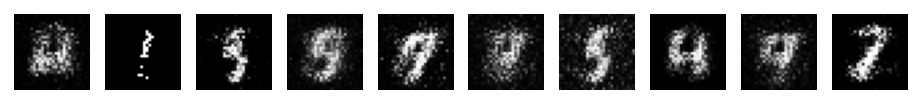

Epoch: 6, G_loss: 0.03934193029999733, D_loss: 0.00579029181972146
Epoch: 7, G_loss: 0.0482378751039505, D_loss: 0.007300132419914007
Epoch: 8, G_loss: 0.041262801736593246, D_loss: 0.005991966929286718
Epoch: 9, G_loss: 0.039898648858070374, D_loss: 0.006273672450333834
Epoch: 10, G_loss: 0.04096793010830879, D_loss: 0.006315999198704958


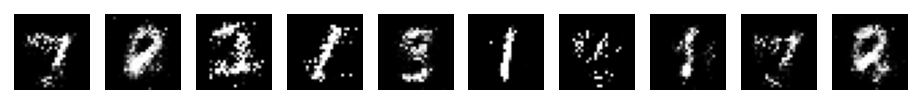

Epoch: 11, G_loss: 0.055435627698898315, D_loss: 0.005874634720385075
Epoch: 12, G_loss: 0.04618437960743904, D_loss: 0.004833685699850321
Epoch: 13, G_loss: 0.042507514357566833, D_loss: 0.004946636036038399
Epoch: 14, G_loss: 0.04452017322182655, D_loss: 0.004934063646942377
Epoch: 15, G_loss: 0.04022112116217613, D_loss: 0.004744907841086388


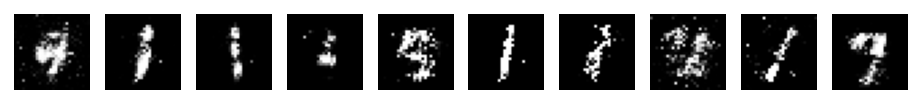

Epoch: 16, G_loss: 0.04021929204463959, D_loss: 0.004811693914234638
Epoch: 17, G_loss: 0.037957124412059784, D_loss: 0.004964672960340977
Epoch: 18, G_loss: 0.038225963711738586, D_loss: 0.0049298107624053955
Epoch: 19, G_loss: 0.03544195368885994, D_loss: 0.005163354333490133
Epoch: 20, G_loss: 0.0330485962331295, D_loss: 0.005545132327824831


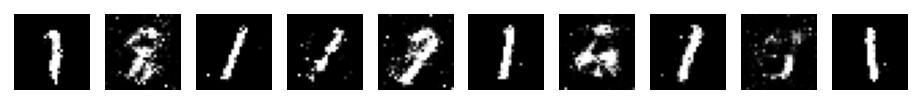

Epoch: 21, G_loss: 0.034615982323884964, D_loss: 0.005564546212553978
Epoch: 22, G_loss: 0.03187822550535202, D_loss: 0.005620693322271109
Epoch: 23, G_loss: 0.032503385096788406, D_loss: 0.005691965110599995
Epoch: 24, G_loss: 0.030739840120077133, D_loss: 0.006201229989528656
Epoch: 25, G_loss: 0.02951313927769661, D_loss: 0.006322881672531366


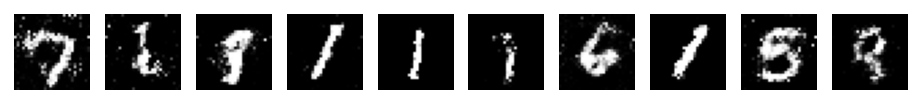

Epoch: 26, G_loss: 0.02914375625550747, D_loss: 0.006477387621998787
Epoch: 27, G_loss: 0.028212351724505424, D_loss: 0.006470825988799334
Epoch: 28, G_loss: 0.02837870828807354, D_loss: 0.006544951349496841
Epoch: 29, G_loss: 0.02797750197350979, D_loss: 0.006851360201835632
Epoch: 30, G_loss: 0.0281430184841156, D_loss: 0.00663635041564703


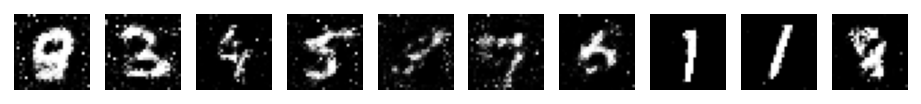

Epoch: 31, G_loss: 0.028026768937706947, D_loss: 0.006628166418522596
Epoch: 32, G_loss: 0.028262024745345116, D_loss: 0.006717773620039225
Epoch: 33, G_loss: 0.02759340964257717, D_loss: 0.006748506799340248
Epoch: 34, G_loss: 0.027266787365078926, D_loss: 0.006846616510301828
Epoch: 35, G_loss: 0.02705329656600952, D_loss: 0.006889975629746914


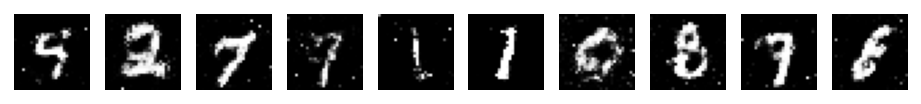

Epoch: 36, G_loss: 0.027147945016622543, D_loss: 0.006928481627255678
Epoch: 37, G_loss: 0.026901954784989357, D_loss: 0.007026507053524256
Epoch: 38, G_loss: 0.026228776201605797, D_loss: 0.006931282579898834
Epoch: 39, G_loss: 0.02573087438941002, D_loss: 0.007063583936542273
Epoch: 40, G_loss: 0.025838512927293777, D_loss: 0.007034866604954004


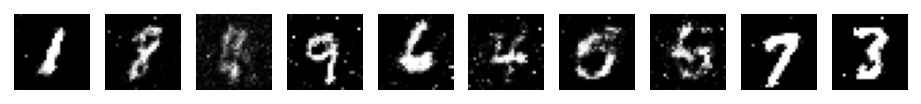

Epoch: 41, G_loss: 0.025493578985333443, D_loss: 0.007125229109078646
Epoch: 42, G_loss: 0.024705588817596436, D_loss: 0.007183575537055731
Epoch: 43, G_loss: 0.025101596489548683, D_loss: 0.007160719018429518
Epoch: 44, G_loss: 0.0245469082146883, D_loss: 0.007248925510793924
Epoch: 45, G_loss: 0.02406257577240467, D_loss: 0.007463347632437944


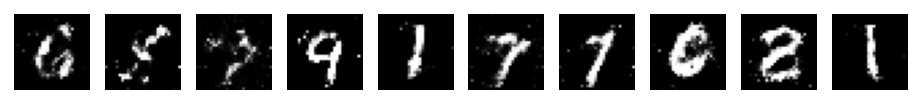

Epoch: 46, G_loss: 0.02430685982108116, D_loss: 0.007294058334082365
Epoch: 47, G_loss: 0.024604951962828636, D_loss: 0.007256925106048584
Epoch: 48, G_loss: 0.024193191900849342, D_loss: 0.00733273895457387
Epoch: 49, G_loss: 0.024333767592906952, D_loss: 0.007233242969959974
Epoch: 50, G_loss: 0.024099664762616158, D_loss: 0.007372700609266758


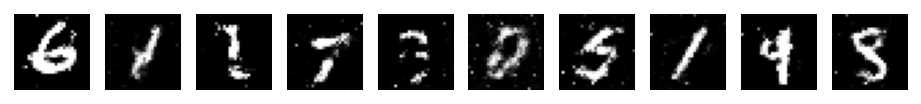

Epoch: 51, G_loss: 0.02469979226589203, D_loss: 0.007223600056022406
Epoch: 52, G_loss: 0.024097032845020294, D_loss: 0.007332518696784973
Epoch: 53, G_loss: 0.02383900061249733, D_loss: 0.007424827199429274
Epoch: 54, G_loss: 0.023539315909147263, D_loss: 0.00743342749774456
Epoch: 55, G_loss: 0.023726467043161392, D_loss: 0.0074179633520543575


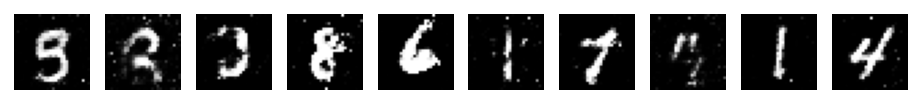

Epoch: 56, G_loss: 0.02349174953997135, D_loss: 0.007540906313806772
Epoch: 57, G_loss: 0.023175382986664772, D_loss: 0.0075235492549836636
Epoch: 58, G_loss: 0.023472385480999947, D_loss: 0.007462202571332455
Epoch: 59, G_loss: 0.023171791806817055, D_loss: 0.007595941890031099
Epoch: 60, G_loss: 0.023268574848771095, D_loss: 0.007544985041022301


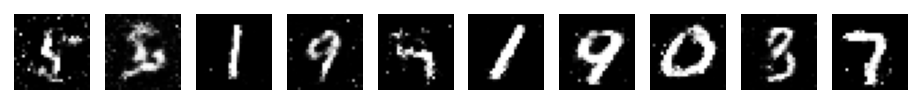

Epoch: 61, G_loss: 0.02325047366321087, D_loss: 0.007478673942387104
Epoch: 62, G_loss: 0.023352380841970444, D_loss: 0.007493898272514343
Epoch: 63, G_loss: 0.02362227253615856, D_loss: 0.007435305044054985
Epoch: 64, G_loss: 0.023335278034210205, D_loss: 0.007449404336512089
Epoch: 65, G_loss: 0.023671656847000122, D_loss: 0.0073991622775793076


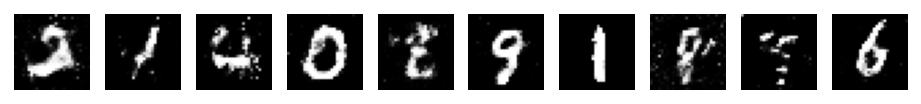

Epoch: 66, G_loss: 0.023548264056444168, D_loss: 0.007442946080118418
Epoch: 67, G_loss: 0.023421840742230415, D_loss: 0.007475870195776224
Epoch: 68, G_loss: 0.023490147665143013, D_loss: 0.007463515270501375
Epoch: 69, G_loss: 0.02306981012225151, D_loss: 0.0075399973429739475
Epoch: 70, G_loss: 0.023219164460897446, D_loss: 0.0074803452007472515


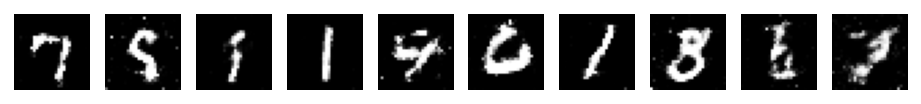

Epoch: 71, G_loss: 0.02275795489549637, D_loss: 0.007512952201068401
Epoch: 72, G_loss: 0.02258669212460518, D_loss: 0.00761754484847188
Epoch: 73, G_loss: 0.02299332618713379, D_loss: 0.007521376945078373
Epoch: 74, G_loss: 0.02341795153915882, D_loss: 0.007462904788553715
Epoch: 75, G_loss: 0.023058297112584114, D_loss: 0.007602601777762175


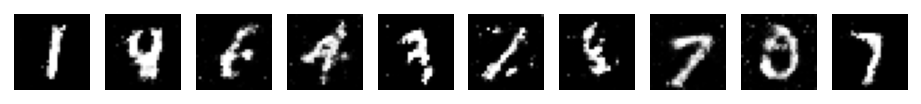

Epoch: 76, G_loss: 0.02292444370687008, D_loss: 0.007558777928352356
Epoch: 77, G_loss: 0.023439016193151474, D_loss: 0.007453974802047014
Epoch: 78, G_loss: 0.023055383935570717, D_loss: 0.0074265883304178715
Epoch: 79, G_loss: 0.023667462170124054, D_loss: 0.007437064778059721
Epoch: 80, G_loss: 0.022787122055888176, D_loss: 0.007585529237985611


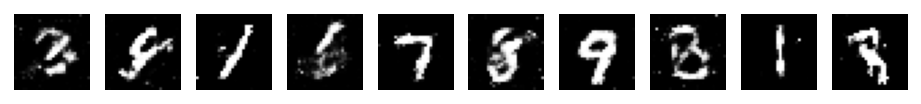

Epoch: 81, G_loss: 0.023013994097709656, D_loss: 0.007530558854341507
Epoch: 82, G_loss: 0.023187557235360146, D_loss: 0.007462798152118921
Epoch: 83, G_loss: 0.023432860150933266, D_loss: 0.007445622701197863
Epoch: 84, G_loss: 0.023134775459766388, D_loss: 0.007420901674777269
Epoch: 85, G_loss: 0.023388024419546127, D_loss: 0.007396291475743055


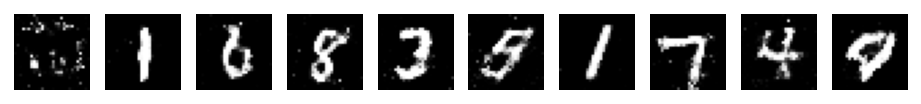

Epoch: 86, G_loss: 0.023356521502137184, D_loss: 0.00740368478000164
Epoch: 87, G_loss: 0.023370152339339256, D_loss: 0.0073569114319980145
Epoch: 88, G_loss: 0.02355383336544037, D_loss: 0.0073739634826779366
Epoch: 89, G_loss: 0.023319434374570847, D_loss: 0.007406459655612707
Epoch: 90, G_loss: 0.02324795164167881, D_loss: 0.007447054143995047


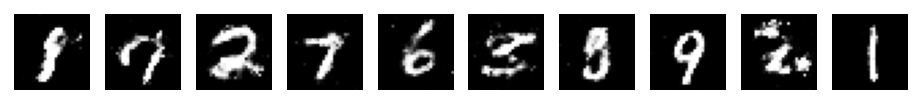

Epoch: 91, G_loss: 0.02324606664478779, D_loss: 0.00750386156141758
Epoch: 92, G_loss: 0.02329936809837818, D_loss: 0.007431157398968935
Epoch: 93, G_loss: 0.023227261379361153, D_loss: 0.007479142863303423
Epoch: 94, G_loss: 0.02360660955309868, D_loss: 0.007400777190923691
Epoch: 95, G_loss: 0.023414691910147667, D_loss: 0.007464095950126648


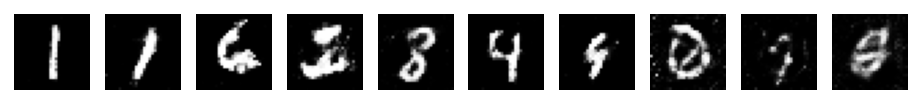

Epoch: 96, G_loss: 0.02348635531961918, D_loss: 0.007458011619746685
Epoch: 97, G_loss: 0.02370665781199932, D_loss: 0.007397985085844994
Epoch: 98, G_loss: 0.023577630519866943, D_loss: 0.007388124708086252
Epoch: 99, G_loss: 0.02330557070672512, D_loss: 0.007420677691698074


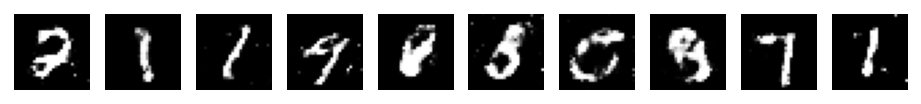

Epoch: 100, G_loss: 0.02368314005434513, D_loss: 0.007350001484155655


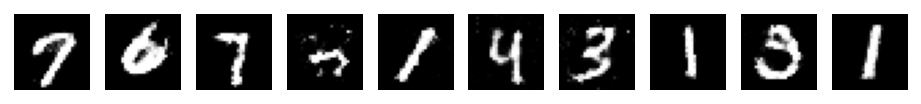

Training Done !


In [6]:
# Training Phase
print_every = 1
plot_every = 5
print("Start training !")

# Training loop
for epoch in range(EPOCHS):
    total = 0
    g_loss_val_sum = 0
    d_loss_val_sum = 0
    for batch_img, _ in train_iter:

        X = batch_img.view(batch_img.size(0), -1).to(device)

        real_lab = torch.ones(batch_img.size(0), 1).to(device)
        
        fake_lab = torch.zeros(batch_img.size(0), 1).to(device)
        
        # Training Discriminator
        D_pred = D.forward(X)
        d_loss_real = criterion(D_pred, real_lab)
        
        z = torch.randn(batch_img.size(0), LATENT_SIZE).to(device)
        
        fake_images = G.forward(z)
        G_pred = D.forward(fake_images)
        d_loss_fake = criterion(G_pred, fake_lab)
        
        d_loss = (d_loss_real + d_loss_fake)/2.
        d_loss_val_sum += d_loss

        d_optimizer.zero_grad()
        g_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()
        
        
        # Training Generator
        z = torch.randn(batch_img.size(0), LATENT_SIZE).to(device)
        fake_images = G.forward(z)
        G_pred = D.forward(fake_images)
        g_loss = criterion(G_pred, real_lab)
        g_loss_val_sum += g_loss

        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()
        
        total += X.size(0)
        
    if (((epoch+1)%print_every)==0) or ((epoch+1)==(EPOCHS-1)):
            print(f"Epoch: {epoch+1}, G_loss: {g_loss_val_sum/total}, D_loss: {d_loss_val_sum/total}")
    if (((epoch+1)%plot_every)==0) or ((epoch+1)==(EPOCHS-1)):
        plot_generator(num = 10)
print("Training Done !")